In [ ]:
# Use seaborn for pairplot
!pip install -q seaborn

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
folders = os.listdir(r'/content/drive/MyDrive/data cuaca untuk crop')
folders.sort()
print(folders)
kolom = ['Tn','Tx','Tavg','RH_avg','RR','ss','ff_x','ddd_x','ff_avg']
df_input = pd.DataFrame(columns = kolom)

for folder in folders :
  files = os.listdir(r'/content/drive/MyDrive/data cuaca untuk crop/'+folder)
  files.sort()
  for file in files :
    a = pd.read_excel(r'/content/drive/MyDrive/data cuaca untuk crop/'+folder+'/' + file,na_values = [8888,9999,"NaN"],header=8)
    a.dropna(axis=0,inplace=True)
    df_input = df_input.append({'Tn':a.mean()[0],'Tx':a.mean()[1],'Tavg':a.mean()[2],'RH_avg':a.mean()[3],'RR':a.mean()[4],
                  'ss':a.mean()[5],'ff_x':a.mean()[6],'ddd_x':a.mean()[7],'ff_avg':a.mean()[8]},ignore_index = True)
    
df_input = df_input.interpolate(method ='linear', limit_direction ='forward') 
ff_x = df_input.pop('ff_x')
ddd_x = df_input.pop('ddd_x')

wd_rad = ddd_x*np.pi / 180

df_input['ff_x'] = ff_x*np.cos(wd_rad)
df_input['ff_y'] = ff_x*np.sin(wd_rad)
 
df_input

['stasiun bandung', 'stasiun bogor', 'stasiun majalengka', 'stasiun sleman']


,Tn,Tx,Tavg,RH_avg,RR,ss,ff_avg,ff_x,ff_y
0,18.379310,23.589655,20.437931,88.137931,13.413793,0.675862,0.655172,0.092443,-3.412541
1,18.827586,26.020690,21.493103,85.931034,6.034483,2.389655,0.344828,0.463031,-2.824366
2,17.392857,26.939286,21.053571,79.250000,2.071429,4.182143,0.321429,1.025045,-2.474677
3,18.967742,23.903226,20.470968,92.419355,27.451613,1.048387,0.741935,1.399327,-3.260818
4,19.034483,26.513793,21.868966,87.379310,17.034483,3.741379,0.206897,1.357687,-2.401390
5,17.937500,26.450000,21.262500,85.250000,4.043750,5.425000,0.437500,1.156519,-2.835731
6,18.000000,23.909091,20.063636,93.272727,25.000000,1.700000,0.818182,0.379777,-2.975864
7,18.692308,26.511538,21.850000,88.000000,8.457692,3.784615,0.346154,-0.434120,-2.462019
8,17.100000,27.163333,21.513333,76.533333,1.120000,6.903333,0.300000,-1.313393,-2.048441
9,18.444444,24.483333,20.605556,90.055556,10.950000,1.538889,0.333333,0.232186,-1.986477


In [ ]:
df_rice = pd.DataFrame()

sheets = ['Kab.Bandung','Kab.Bogor','Kab.Majalengka','Kab.Sleman']

for sheet in enumerate(sheets) :
  a = pd.read_excel(r'/content/drive/MyDrive/Dataset crop/dataset_crop.xlsx',na_values = ["NaN"],usecols = [1],sheet_name = sheet[0])
  a.dropna(axis=0,inplace=True)
  df_rice = df_rice.append(a)

df_rice = df_rice.reset_index(drop=True)
df_input = df_input.join(df_rice['produksi/luas padi sawah'],how = 'left')
df_rice

,produksi/luas padi sawah
0,60.70
1,64.00
2,63.24
3,67.22
4,67.02
5,69.55
6,55.76
7,62.05
8,62.07
9,59.18


In [ ]:
df_corn = pd.DataFrame()

sheets = ['Kab.Bandung','Kab.Bogor','Kab.Majalengka','Kab.Sleman']

for sheet in enumerate(sheets) :
  a = pd.read_excel(r'/content/drive/MyDrive/Dataset crop/dataset_crop.xlsx',na_values = ["NaN"],usecols = [2],sheet_name = sheet[0])
  a.dropna(axis=0,inplace=True)
  df_corn = df_corn.append(a)

df_corn = df_corn.reset_index(drop=True)
df_input = df_input.join(df_corn['produksi/luas jagung'],how = 'left')
df_corn

train_dataset = df_input

,produksi/luas jagung
0,58.47
1,57.03
2,46.08
3,71.04
4,90.07
5,66.73
6,54.34
7,51.10
8,56.15
9,44.14


In [ ]:
train_input = train_dataset.copy()

train_labels_rice = train_input.pop('produksi/luas padi sawah')
train_labels_corn = train_input.pop('produksi/luas jagung')

train_input =  np.array(train_input)
train_labels_rice = np.array(train_labels_rice)
train_labels_corn = np.array(train_labels_corn)
print(train_input)
print(train_labels_rice)

[[ 1.83793103e+01  2.35896552e+01  2.04379310e+01  8.81379310e+01
   1.34137931e+01  6.75862069e-01  6.55172414e-01  9.24434167e-02
  -3.41254122e+00]
 [ 1.88275862e+01  2.60206897e+01  2.14931034e+01  8.59310345e+01
   6.03448276e+00  2.38965517e+00  3.44827586e-01  4.63031232e-01
  -2.82436556e+00]
 [ 1.73928571e+01  2.69392857e+01  2.10535714e+01  7.92500000e+01
   2.07142857e+00  4.18214286e+00  3.21428571e-01  1.02504491e+00
  -2.47467732e+00]
 [ 1.89677419e+01  2.39032258e+01  2.04709677e+01  9.24193548e+01
   2.74516129e+01  1.04838710e+00  7.41935484e-01  1.39932723e+00
  -3.26081804e+00]
 [ 1.90344828e+01  2.65137931e+01  2.18689655e+01  8.73793103e+01
   1.70344828e+01  3.74137931e+00  2.06896552e-01  1.35768726e+00
  -2.40138989e+00]
 [ 1.79375000e+01  2.64500000e+01  2.12625000e+01  8.52500000e+01
   4.04375000e+00  5.42500000e+00  4.37500000e-01  1.15651878e+00
  -2.83573105e+00]
 [ 1.80000000e+01  2.39090909e+01  2.00636364e+01  9.32727273e+01
   2.50000000e+01  1.7000000

In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(train_input)

In [ ]:
model_rice = keras.Sequential([
  normalizer,
  layers.Dense(64, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(1)
  ])

model_corn = keras.Sequential([
  normalizer,
  layers.Dense(64, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(1)
  ])


model_rice.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

model_corn.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [ ]:
model_rice.summary()
model_rice.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 9)                 19        
_________________________________________________________________
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 1,844
Trainable params: 1,825
Non-trainable params: 19
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 Outp

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

Epoch 1/200
2/2 [==============================] - 1s 321ms/step - loss: 62.2474 - val_loss: 64.1407
Epoch 2/200
2/2 [==============================] - 0s 25ms/step - loss: 62.1908 - val_loss: 64.1239
Epoch 3/200
2/2 [==============================] - 0s 22ms/step - loss: 62.1501 - val_loss: 64.1125
Epoch 4/200
2/2 [==============================] - 0s 22ms/step - loss: 62.1260 - val_loss: 64.1012
Epoch 5/200
2/2 [==============================] - 0s 21ms/step - loss: 62.1100 - val_loss: 64.0914
Epoch 6/200
2/2 [==============================] - 0s 22ms/step - loss: 62.0967 - val_loss: 64.0826
Epoch 7/200
2/2 [==============================] - 0s 22ms/step - loss: 62.0869 - val_loss: 64.0741
Epoch 8/200
2/2 [==============================] - 0s 31ms/step - loss: 62.0782 - val_loss: 64.0661
Epoch 9/200
2/2 [==============================] - 0s 23ms/step - loss: 62.0691 - val_loss: 64.0576
Epoch 10/200
2/2 [==============================] - 0s 29ms/step - loss: 62.0596 - val_loss: 64.048

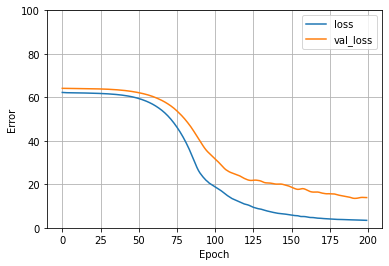

In [ ]:
history_rice = model_rice.fit(
    train_input, train_labels_rice,
    validation_split=0.2,
    verbose=1, epochs=200)

plot_loss(history_rice)

Epoch 1/150
2/2 [==============================] - 1s 140ms/step - loss: 56.2073 - val_loss: 54.8619
Epoch 2/150
2/2 [==============================] - 0s 28ms/step - loss: 56.1642 - val_loss: 54.8344
Epoch 3/150
2/2 [==============================] - 0s 23ms/step - loss: 56.1261 - val_loss: 54.8075
Epoch 4/150
2/2 [==============================] - 0s 31ms/step - loss: 56.0987 - val_loss: 54.7845
Epoch 5/150
2/2 [==============================] - 0s 27ms/step - loss: 56.0756 - val_loss: 54.7651
Epoch 6/150
2/2 [==============================] - 0s 23ms/step - loss: 56.0550 - val_loss: 54.7497
Epoch 7/150
2/2 [==============================] - 0s 26ms/step - loss: 56.0338 - val_loss: 54.7372
Epoch 8/150
2/2 [==============================] - 0s 23ms/step - loss: 56.0114 - val_loss: 54.7259
Epoch 9/150
2/2 [==============================] - 0s 26ms/step - loss: 55.9877 - val_loss: 54.7153
Epoch 10/150
2/2 [==============================] - 0s 31ms/step - loss: 55.9622 - val_loss: 54.704

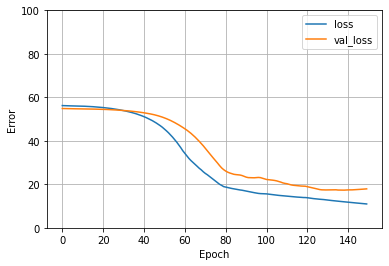

In [ ]:
history_corn = model_corn.fit(
    train_input, train_labels_corn,
    validation_split=0.2,
    verbose=1, epochs=150)

plot_loss(history_corn)

In [ ]:
result_rice = model_rice.predict([[19.60908,30.021885,25.367077,78.33284,6.2988048,6.2865496,-0.3123911,-2.2975235,-0.69789666]])
result_corn = model_corn.predict([[19.60908,30.021885,25.367077,78.33284,6.2988048,6.2865496,-0.3123911,-2.2975235,-0.69789666]])
print(result_rice)
print(result_corn)

[[35.603306]]
[[27.453857]]
